## Processamento de Linguagem Natural para Análise de Críticas de Filmes

Database em https://www.kaggle.com/luisfredgs/imdb-ptbr

In [65]:
import pandas as pd

In [66]:
review = pd.read_csv("imdb-reviews-pt-br.csv")
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [67]:
# trocando neg por 0 e pos por 1
change = review["sentiment"].replace(["neg", "pos"], [0, 1])
change.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [68]:
# adicionando coluna a review
review["sentimentBIN"] = change
review.head()

,id,text_en,text_pt,sentiment,sentimentBIN
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [69]:
# checando se dados estão balanceados para executar treinamento
print(review["sentimentBIN"].value_counts())

0    24765
1    24694
Name: sentimentBIN, dtype: int64


In [70]:
lowercasePhrase = list()

for i in review["text_pt"]: 
    lowercasePhrase.append(i.lower())

review['reviewLowercase'] = lowercasePhrase

review.head()

,id,text_en,text_pt,sentiment,sentimentBIN,reviewLowercase
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"mais uma vez, o sr. costner arrumou um filme p..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,este é um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,nem mesmo os beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes de fotos de latão não é uma palavra apr...


### WORLD CLOUD

Biblioteca em https://github.com/amueller/word_cloud

Para criar a nuvem de palavras é necessário retirar do texto palavras que são irrelevantes (stop words) para que a análise não seja corrompida por um excesso de palavras como "de", "para", "a", "o", etc

In [71]:
!pip install -U nltk

Requirement already up-to-date: nltk in /Users/izabellamelo/miniconda3/lib/python3.7/site-packages (3.4)


In [72]:
# download data
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package cess_

True

In [73]:
from nltk import tokenize

In [74]:
stopWords = nltk.corpus.stopwords.words("portuguese")
newStopWords = ["é", "filme", "eu", "ser", "sobre", "filmes", "...", "-", "tão", "realmente", "apenas", 
                "ter", "pode", "outro", "porque", "filme,", "qualquer", "história", "filme", "pessoa", "cena", 
                "então", "todo", "todos", "filme.", "pessoas", "personagens", "vez", "faz", "algumas", "tempo", "/", 
                "e,", "ver", "ainda"]
stopWords.extend(newStopWords)
# print(stopWords)
withoutStopWords = list()
spaceToken = tokenize.WhitespaceTokenizer()

for i in review["reviewLowercase"]:
    phrase = list()
    textWords = spaceToken.tokenize(i)
    
    for words in textWords:
        if words not in stopWords:
            phrase.append(words)
    
    withoutStopWords.append(' '.join(phrase))

review['reviewWithoutStopWords'] = withoutStopWords
    

In [75]:
review.head()

,id,text_en,text_pt,sentiment,sentimentBIN,reviewLowercase,reviewWithoutStopWords
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"mais uma vez, o sr. costner arrumou um filme p...","vez, sr. costner arrumou necessário. além terr..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,este é um exemplo do motivo pelo qual a maiori...,exemplo motivo maioria ação mesmos. genérico c...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"primeiro de tudo eu odeio esses raps imbecis, ...","primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,nem mesmo os beatles puderam escrever músicas ...,"beatles puderam escrever músicas gostassem, em..."
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes de fotos de latão não é uma palavra apr...,"fotos latão palavra apropriada eles, verdade, ..."



Já com o texto sem palavras irrelevantes, podemos exibir uma nuvem de palavras de resenhas positivas e de resenhas
negativas


In [76]:
!pip install wordcloud
!python -m pip install -U matplotlib

Requirement already up-to-date: matplotlib in /Users/izabellamelo/miniconda3/lib/python3.7/site-packages (3.0.3)


In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [78]:
# nuvem de palavras positivas
posReview = review.query("sentiment=='pos'")
print(posReview["reviewWithoutStopWords"][12389])

wordsPos = ' '.join([word for word in posReview["reviewWithoutStopWords"]])

vi ontem noite persuadido alguns amigos meus. admitiria relutante vê-lo porque, sabia ashton kutcher, conseguia fazer comédia. errado. kutcher interpretou personagem jake fischer bem, kevin costner interpretou ben randall tal profissionalismo. sinal bom brincar emoções. fez exatamente isso. teatro vendido superado riso durante primeira metade levado lágrimas durante segundo semestre. sair teatro, vi muitas mulheres lágrimas, muitos homens adultos, tentando desesperadamente deixar ninguém vê-los chorando. ótimo, sugiro vá vê-lo antes julgar.


In [79]:
cloudPos = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(wordsPos)

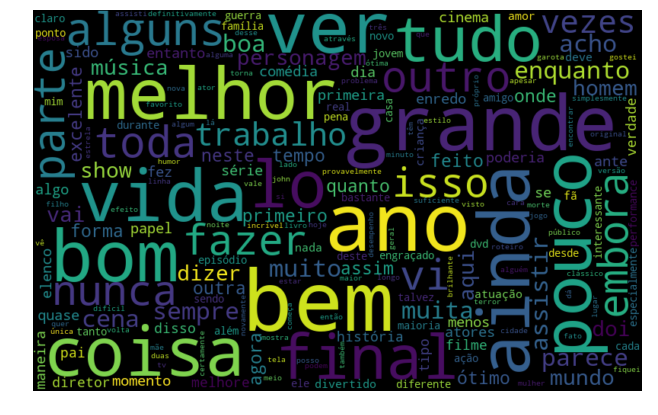

In [80]:
plt.figure(figsize=(30,7))
plt.imshow(cloudPos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [81]:
# nuvem de palavras negativas
negReview = review.query("sentiment=='neg'")
print(negReview["reviewWithoutStopWords"][0])

wordsNeg = ' '.join([word for word in negReview["reviewWithoutStopWords"]])

vez, sr. costner arrumou necessário. além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. maioria fantasmas armário, personagem costers realizado logo início, esquecido tarde, importava. personagem deveríamos importar arrogante superconfiante, ashton kutcher. problema sai garoto pensa melhor outra redor mostra sinais armário desordenado. único obstáculo parece estar vencendo costner. finalmente, bem além meio caminho, costner conta fantasmas kutchers. informados kutcher levado melhor pressentimentos presságios anteriores. nenhuma mágica aqui, tudo podia fazer desligar hora.


In [82]:
cloudNeg = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(wordsNeg)

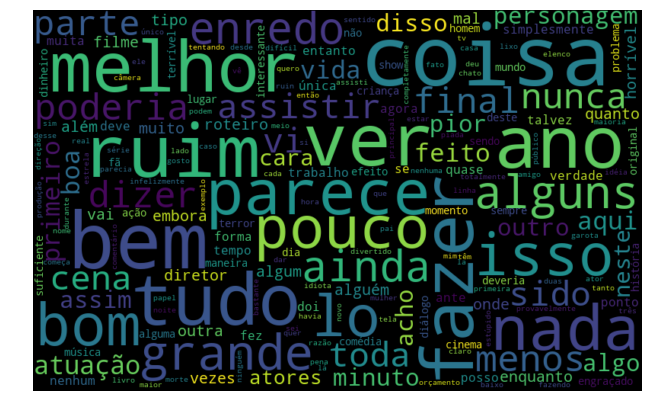

In [83]:
plt.figure(figsize=(30,7))
plt.imshow(cloudNeg, interpolation="bilinear")
plt.axis("off")
plt.show()

In [84]:
spaceToken = tokenize.WhitespaceTokenizer()
allWords = ' '.join([text for text in review["reviewWithoutStopWords"]])

frequency = nltk.FreqDist(spaceToken.tokenize(allWords))

frequencyDF = pd.DataFrame({"Palavras": list(frequency.keys()),
                           "Frequencia": list(frequency.values())})
frequencyDF.head()

,Palavras,Frequencia
0,"vez,",1929
1,sr.,1836
2,costner,50
3,arrumou,3
4,necessário.,135


In [85]:
frequencyDFtop10 = frequencyDF.nlargest(columns="Frequencia", n=50)
frequencyDFtop10

,Palavras,Frequencia
98,ver,16645
122,ainda,15504
51,bem,14420
144,pouco,14230
280,anos,14190
37,melhor,13956
741,alguns,13871
233,grande,13545
67,fazer,13445
46,parece,13245


In [86]:
!pip install seaborn

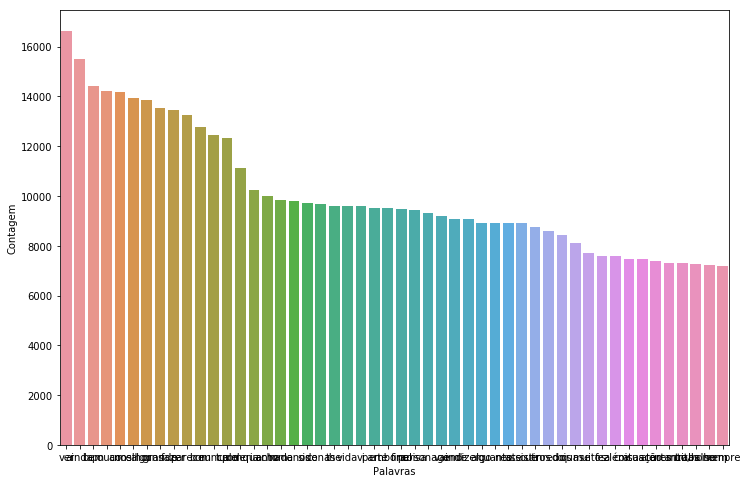

In [87]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data=frequencyDFtop10, x="Palavras", y="Frequencia")
ax.set(ylabel="Contagem")
plt.show()

### BAG OF WORDS
Neste modelo, o texto (uma frase ou documento) é representado como um multiconjunto de suas palavras (o "saco"), desconsiderando a estrutura gramatical e até mesmo a ordenação delas, mas mantendo sua multiplicidade


In [88]:
# implementando bag of words (fazendo dicionário de palavras)
from sklearn.feature_extraction.text import CountVectorizer

In [89]:
model = CountVectorizer(lowercase=True, max_features=50)

bagOfWords = model.fit_transform(review["reviewWithoutStopWords"])
model.get_feature_names()

['acho',
 'ainda',
 'algo',
 'alguns',
 'anos',
 'aqui',
 'assim',
 'assistir',
 'atores',
 'atuação',
 'bem',
 'bom',
 'cenas',
 'coisa',
 'coisas',
 'disso',
 'dizer',
 'dois',
 'embora',
 'enquanto',
 'enredo',
 'fazer',
 'final',
 'grande',
 'homem',
 'isso',
 'lo',
 'melhor',
 'menos',
 'nada',
 'neste',
 'nunca',
 'onde',
 'outros',
 'parece',
 'parte',
 'personagem',
 'poderia',
 'pouco',
 'quanto',
 'ruim',
 'sido',
 'the',
 'trabalho',
 'tudo',
 'vai',
 'ver',
 'vezes',
 'vi',
 'vida']

In [90]:
# transformando numa matriz para visualizar melhor
dictionary = pd.SparseDataFrame(bagOfWords, columns = model.get_feature_names())
dictionary.head()

,acho,ainda,algo,alguns,anos,aqui,assim,assistir,atores,atuação,...,ruim,sido,the,trabalho,tudo,vai,ver,vezes,vi,vida
0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,1.0,1.0,3.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# separando dados para treino e teste (75% treino, 25% teste)
from sklearn.model_selection import train_test_split

In [92]:
train, test, trainClass, testClass = train_test_split(bagOfWords, review["sentimentBIN"], random_state = 42)

In [93]:
print(train.shape)
print(test.shape)

(37094, 50)
(12365, 50)


In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
# treinando
logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(train, trainClass)

# testando
score = logisticRegression.score(test, testClass)
print(score)

0.694298422968055
